## First K-Means Clustering Code

Find the tutorial here: https://realpython.com/k-means-clustering-python/

### 1. Install required packages IF you do not have them

In [ ]:
!conda install matplotlib numpy pandas seaborn scikit-learn ipython
!conda install -c conda-forge kneed

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Synthetic data to explore

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

#Nondeterministic machine learning algorithms like k-means are difficult to reproduce.
#The random_state parameter is set to an integer value so you can follow the data presented in the tutorial.
#In practice, it’s best to leave random_state as the default value, None.

In [4]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [5]:
true_labels[:5]

array([1, 0, 2, 2, 2])

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. A great way to determine which technique is appropriate for your dataset is to read scikit-learn’s preprocessing documentation.

In this example, you’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. 

**Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:**

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [8]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [9]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [10]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [11]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [13]:
# First five predicted labels:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

### Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:

1. The elbow method
2. The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [19]:
# 1. The Elbow Method:

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [15]:
sse

[400.00000000000006,
 173.23074893877768,
 74.57960106819854,
 61.30474344497751,
 52.275387259021116,
 43.9631176783282,
 38.52881875287544,
 34.82637407026125,
 31.13865746439757,
 27.89657236940264]

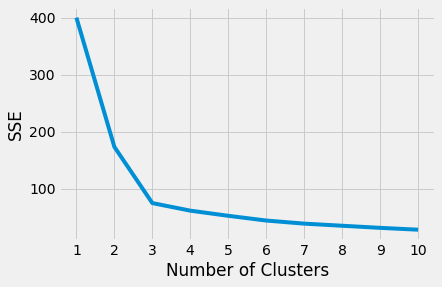

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [18]:
# Python package "kneed" can choose the elbow point for you

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. **Larger numbers indicate that samples are closer to their clusters than they are to other clusters.**

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [20]:
# 2. The Silhouette Coefficient:

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [21]:
silhouette_coefficients

[0.5449728784485278,
 0.5915043942870359,
 0.4916111520533458,
 0.3917276033027511,
 0.36713672897176225,
 0.3532613280636168,
 0.36574407217979016,
 0.3579272766766677,
 0.36072658261846047]

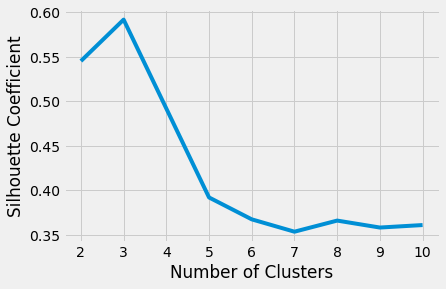

In [22]:
# Plotting 
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Evaluating Clustering Performance Using Advanced Techniques

The elbow method and silhouette coefficient evaluate clustering performance without the use of ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

> Note: In practice, it’s rare to encounter datasets that have ground truth labels.

When comparing k-means against a density-based approach on nonspherical clusters, the results from the elbow method and silhouette coefficient rarely match human intuition. This scenario highlights why advanced clustering evaluation techniques are necessary. To visualize an example, import these additional modules:

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [24]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [25]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [26]:
print(kmeans_silhouette)
print(dbscan_silhouette)

0.5
0.38


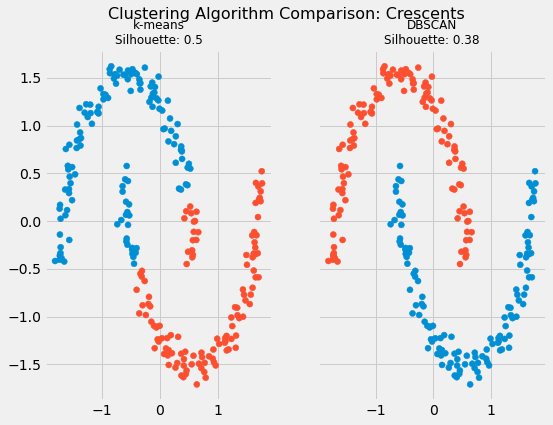

In [27]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

A higher silhouette coefficient suggests better clusters, which is misleading in this scenario. The silhouette coefficient is higher for the k-means algorithm. The DBSCAN algorithm appears to find more natural clusters according to the shape of the data. This suggests that you need a better method to compare the performance of these two clustering algorithms.

In [28]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)


In [29]:
round(ari_kmeans, 2)

0.47

In [30]:
round(ari_dbscan, 2)

1.0

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.

There are several metrics that evaluate the quality of clustering algorithms. Reading through the implementations in scikit-learn will help you select an appropriate clustering evaluation metric.

# How to Build a K-Means Clustering Pipeline in Python

Now that you have a basic understanding of k-means clustering in Python, it’s time to perform k-means clustering on a real-world dataset. These data contain gene expression values from a manuscript authored by The Cancer Genome Atlas (TCGA) Pan-Cancer analysis project investigators.

There are 881 samples (rows) representing five distinct cancer subtypes. Each sample has gene expression values for 20,531 genes (columns). The dataset is available from the UC Irvine Machine Learning Repository, but you can use the Python code below to obtain the data programmatically.

In this section, you’ll build a robust k-means clustering pipeline. Since you’ll perform multiple transformations of the original input data, your pipeline will also serve as a practical clustering framework.

## Building a K-Means Clustering Pipeline

Assuming you want to start with a fresh namespace, import all the modules needed to build and evaluate the pipeline, including pandas and seaborn for more advanced visualizations:

In [31]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [32]:
# Download and extract the TCGA dataset from UCI:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

The KMeans class in scikit-learn requires a NumPy array as an argument. The NumPy package has a helper function to load the data from the text file into memory as NumPy arrays:

In [33]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

In [34]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [35]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

The data variable contains all the gene expression values from 20,531 genes. The true_label_names are the cancer types for each of the 881 samples. The first record in data corresponds with the first label in true_labels.

The labels are strings containing abbreviations of cancer types:

BRCA: Breast invasive carcinoma
COAD: Colon adenocarcinoma
KIRC: Kidney renal clear cell carcinoma
LUAD: Lung adenocarcinoma
PRAD: Prostate adenocarcinoma
To use these labels in the evaluation methods, you first need to convert the abbreviations to integers with LabelEncoder:

In [36]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0])

In [37]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [38]:
n_clusters = len(label_encoder.classes_)

The next code block introduces you to the concept of scikit-learn pipelines. The scikit-learn Pipeline class is a concrete implementation of the abstract idea of a machine learning pipeline.

Your gene expression data aren’t in the optimal format for the KMeans class, so you’ll need to build a preprocessing pipeline. The pipeline will implement an alternative to the StandardScaler class called MinMaxScaler for feature scaling. **You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution.**

The next step in your preprocessing pipeline will implement the PCA class to perform dimensionality reduction:

In [39]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

Now that you’ve built a pipeline to process the data, you’ll build a separate pipeline to perform k-means clustering. You’ll override the following default arguments of the KMeans class:

init: You’ll use "k-means++" instead of "random" to ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random".

n_init: You’ll increase the number of initializations to ensure you find a stable solution.

max_iter: You’ll increase the number of iterations per initialization to ensure that k-means will converge.

Build the k-means clustering pipeline with user-defined arguments in the KMeans constructor:

In [40]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

The Pipeline class can be chained to form a larger pipeline. Build an end-to-end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelines to Pipeline:

In [41]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [44]:
# Calling .fit() with data as the argument
# performs all the pipeline steps on the data:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

The pipeline performs all the necessary steps to execute k-means clustering on the gene expression data! Depending on your Python REPL, .fit() may print a summary of the pipeline. Objects defined inside pipelines are accessible using their step name.

Evaluate the performance by calculating the silhouette coefficient:

In [45]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450287

In [48]:
# Calculate ARI, too,
# since the ground truth cluster labels are available:

adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

As mentioned earlier, the scale for each of these clustering performance metrics ranges from -1 to 1. A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

Since you specified n_components=2 in the PCA step of the k-means clustering pipeline, you can also visualize the data in the context of the true labels and predicted labels. Plot the results using a pandas DataFrame and the seaborn plotting library:

In [49]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)


/Users/mervebduman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


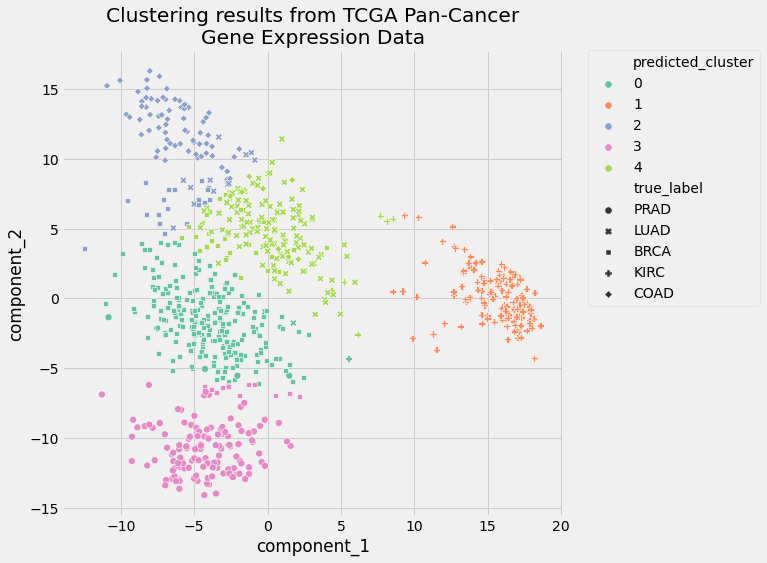

In [50]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

The visual representation of the clusters confirms the results of the two clustering evaluation metrics. The performance of your pipeline was pretty good. The clusters only slightly overlapped, and cluster assignments were much better than random.

# Tuning a K-Means Clustering Pipeline

Your first k-means clustering pipeline performed well, but there’s still room to improve. That’s why you went through the trouble of building the pipeline: you can tune the parameters to get the most desirable clustering results.

The process of parameter tuning consists of sequentially altering one of the input values of the algorithm’s parameters and recording the results. At the end of the parameter tuning process, you’ll have a set of performance scores, one for each new value of a given parameter. Parameter tuning is a powerful method to maximize performance from your clustering pipeline.

By setting the PCA parameter n_components=2, you squished all the features into two components, or dimensions. This value was convenient for visualization on a two-dimensional plot. But using only two components means that the PCA step won’t capture all of the explained variance of the input data.

Explained variance measures the discrepancy between the PCA-transformed data and the actual input data. The relationship between n_components and explained variance can be visualized in a plot to show you how many components you need in your PCA to capture a certain percentage of the variance in the input data. You can also use clustering performance metrics to evaluate how many components are necessary to achieve satisfactory clustering results.

In this example, you’ll use clustering performance metrics to identify the appropriate number of components in the PCA step. The Pipeline class is powerful in this situation. It allows you to perform basic parameter tuning using a for loop.

Iterate over a range of n_components and record evaluation metrics for each iteration:

In [51]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

Plot the evaluation metrics as a function of n_components to visualize the relationship between adding components and the performance of the k-means clustering results:

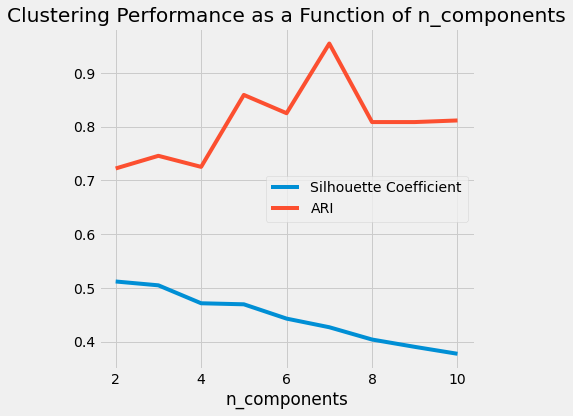

In [52]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

There are two takeaways from this figure:

1. The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.

2. The ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.

Like most machine learning decisions, you must balance optimizing clustering evaluation metrics with the goal of the clustering task. In situations when cluster labels are available, as is the case with the cancer dataset used in this tutorial, ARI is a reasonable choice. ARI quantifies how accurately your pipeline was able to reassign the cluster labels.

The silhouette coefficient, on the other hand, is a good choice for exploratory clustering because it helps to identify subclusters. These subclusters warrant additional investigation, which can lead to new and important insights.

# Conclusion

You now know how to perform k-means clustering in Python. Your final k-means clustering pipeline was able to cluster patients with different cancer types using real-world gene expression data. You can use the techniques you learned here to cluster your own data, understand how to get the best clustering results, and share insights with others.

In this tutorial, you learned:

- What the popular clustering techniques are and when to use them
- What the k-means algorithm is
- How to implement k-means clustering in Python
- How to evaluate the performance of clustering algorithms
- How to build and tune a robust k-means clustering pipeline in Python
- How to analyze and present clustering results from the k-means algorithm

You also took a whirlwind tour of scikit-learn, an accessible and extensible tool for implementing k-means clustering in Python.